In [1]:
import sys
sys.path.append("../../")

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import torch
import pyro
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
from tqdm.auto import tqdm
from stockpy.probabilistic import DMM
from util.StockDataset import StockDataset, StockDatasetSequence
from torch.utils.data import DataLoader
from pyro.infer import SVI, Trace_ELBO, Predictive

In [3]:
# set style of graphs
plt.style.use('ggplot')
from pylab import rcParams
plt.rcParams['figure.dpi'] = 100

In [4]:
df = pd.read_csv('../../stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how="any")
X_train, X_test = train_test_split(df, test_size=0.1, shuffle=False)

In [5]:
predictor = DMM()
predictor.fit(X_train, batch_size=24, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

[train loss: ]  0.8853
[train loss: ]  0.6325
[train loss: ]  0.8943
[train loss: ]  0.9112
[train loss: ]  1.0967
[val loss: ]  2.6768
[train loss: ]  1.0110
[train loss: ]  1.3008
[train loss: ]  1.0627
[train loss: ]  1.1630
[train loss: ]  0.9708
[val loss: ]  3.0752


In [6]:
samples, std, mean = predictor.predict(X_test)

TypeError: unsupported operand type(s) for *: 'dict' and 'float'

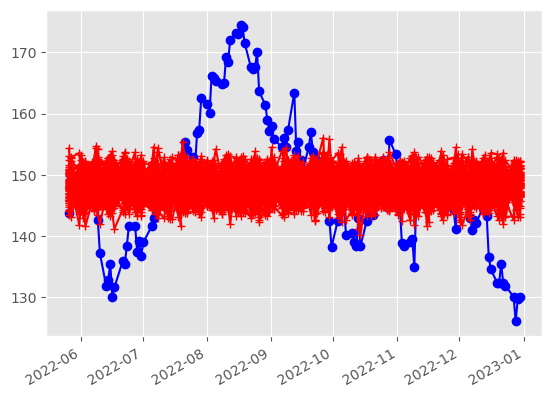

In [ ]:
y_test = (X_test['Close']).values 
days = np.array(X_test.index, dtype="datetime64[ms]")
            
fig = plt.figure()
            
axes = fig.add_subplot(111)
axes.plot(days, y_test, 'bo-', label="actual") 
axes.plot(days, y_pred, 'r+-', label="predicted")
            
fig.autofmt_xdate()
            
# plt.legend()
plt.show()

In [ ]:
train_dl = StockDatasetSequence(X_test)

train_dl = DataLoader(train_dl, batch_size=24, shuffle=False)

In [ ]:
SVI.evaluate_loss

<function pyro.infer.svi.SVI.evaluate_loss(self, *args, **kwargs)>